<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/profes_clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas e DataSet

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('oric-data_2018.csv') # Deixar arquivo na mesma pasta do notebook

# Verificando o dataset
df.head()

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
0,4970767.0,4331363.0,4500026.0,10054901.0,470741.0,4225121.0,5829780.0,3030655.0,0.0,2550000
1,7797039.0,5561156.0,6537053.0,7798975.0,1259986.0,1641702.0,6157273.0,1359229.0,0.0,5000000
2,24735297.0,21684470.0,30668490.0,25516066.0,-5933193.0,12338134.0,13177932.0,515417.0,0.0,5000000
3,9890688.0,7849392.0,8092319.0,12520458.0,1798369.0,2222107.0,10298351.0,2299144.0,0.0,5000000
4,21331662.0,8634192.0,19725559.0,17582281.0,1606103.0,6759203.0,10823078.0,4358012.0,0.0,5000000


# Pairplot para a verificação das distribuições e relações entre as variáveis

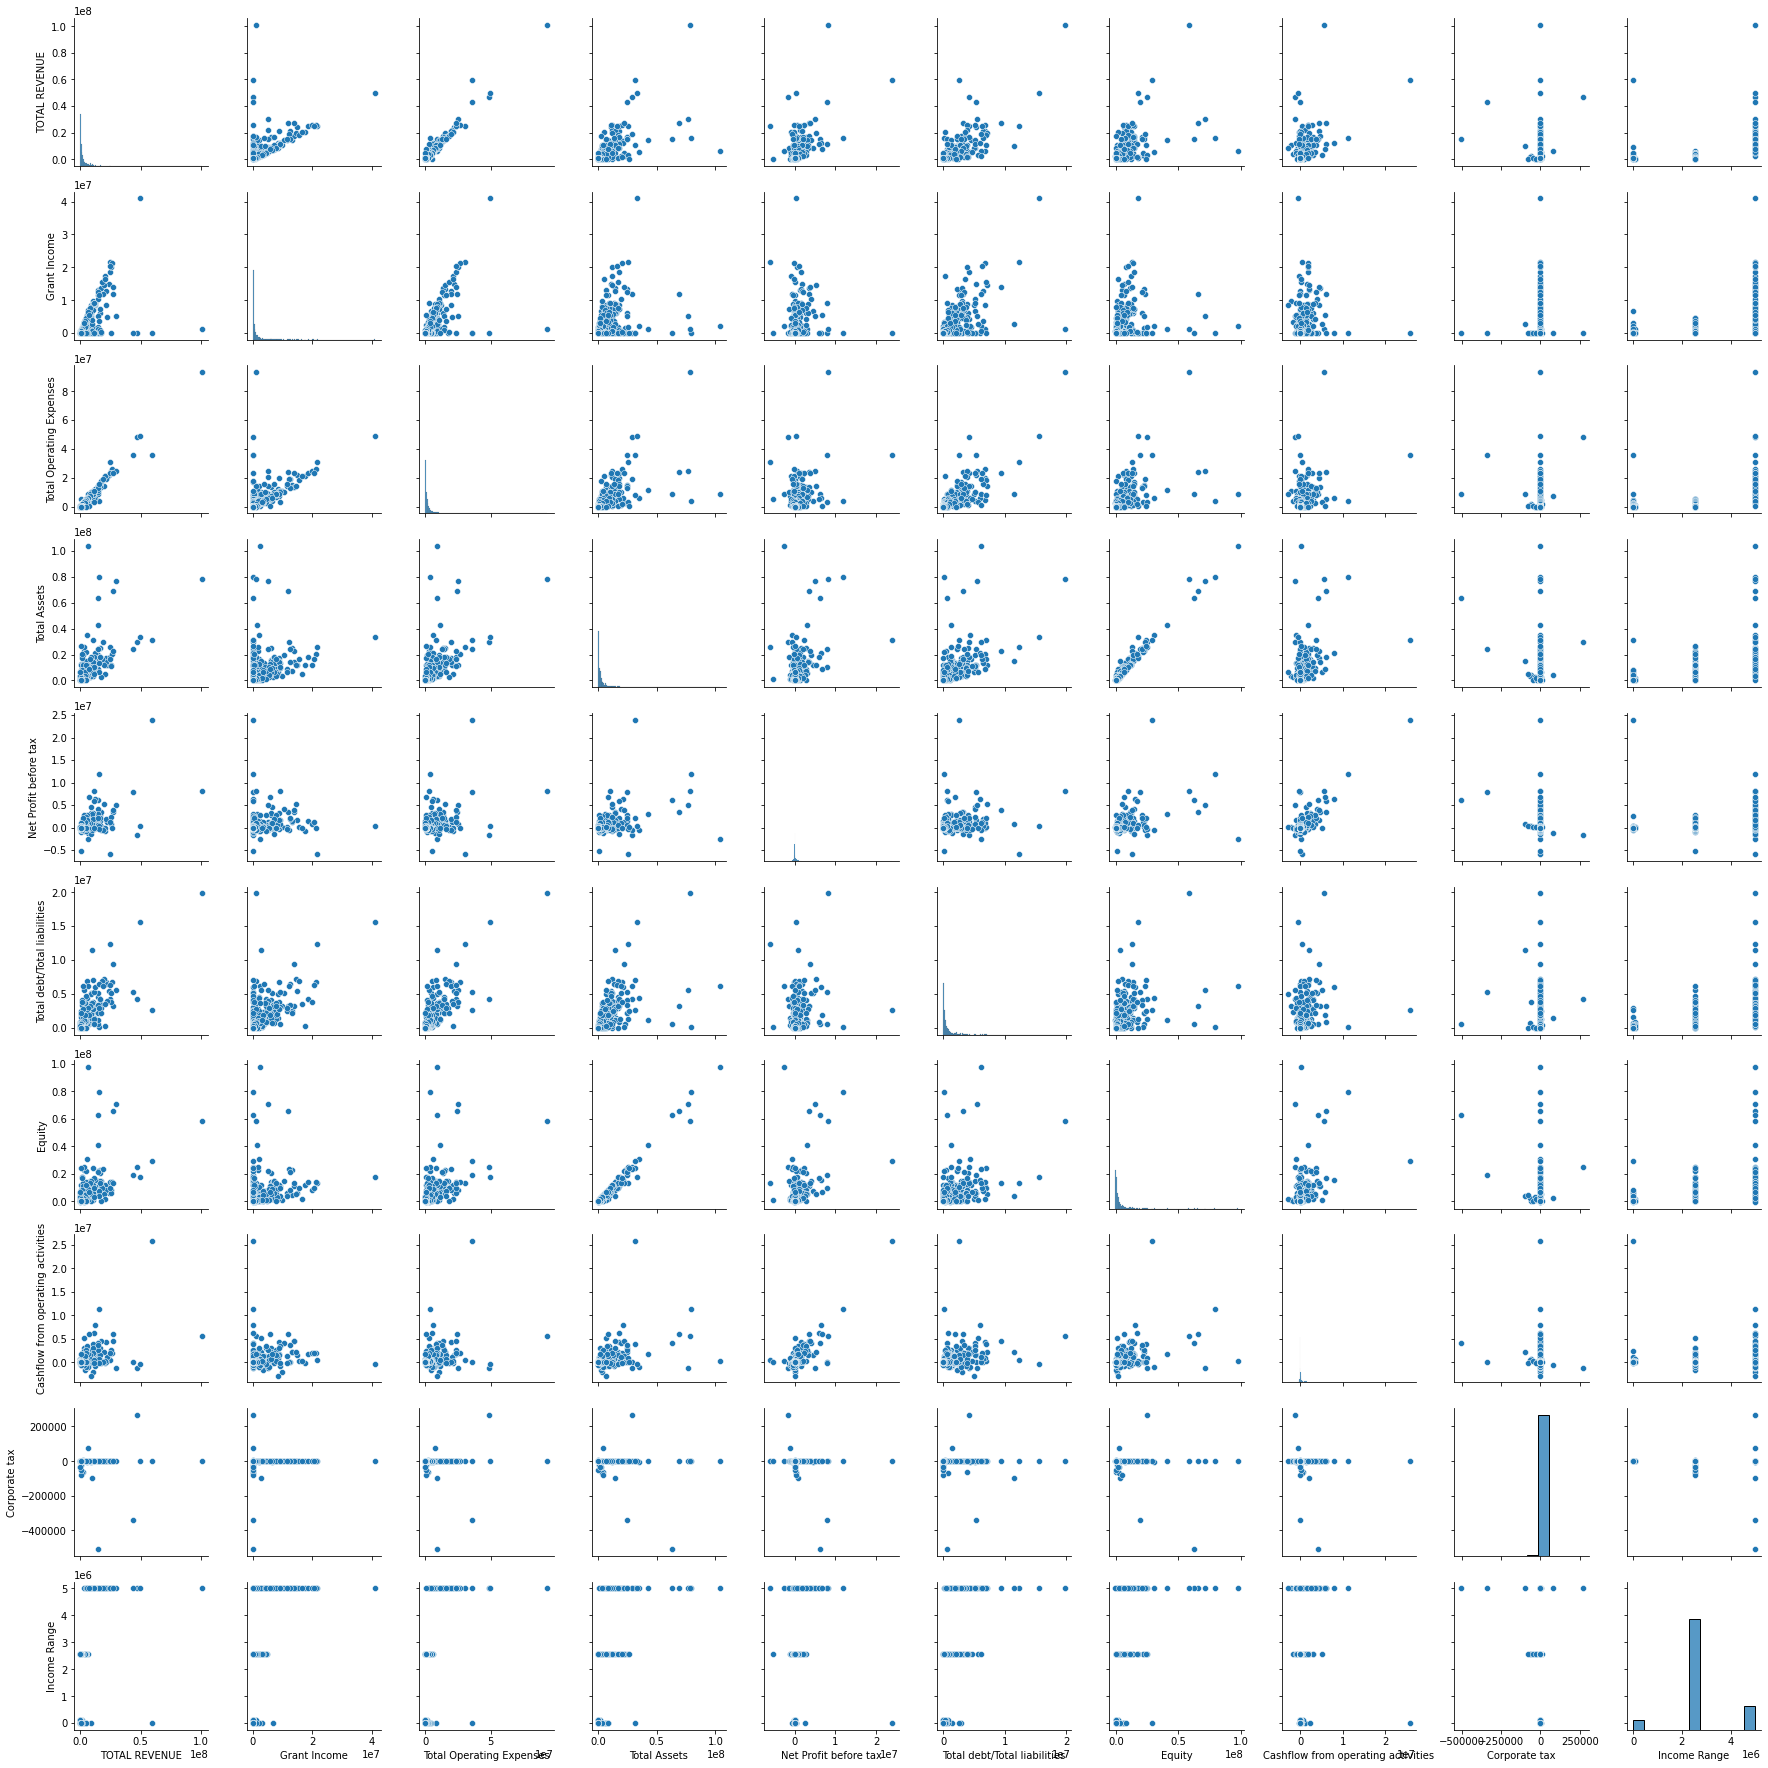

In [2]:
sns.pairplot(df);

# Verificação de possíveis valores ausentes

In [3]:
df.isna().sum()

TOTAL REVENUE                         0
Grant Income                          0
Total Operating Expenses              0
Total Assets                          0
Net Profit before tax                 0
Total debt/Total liabilities          0
Equity                                0
Cashflow from operating activities    0
Corporate tax                         0
Income Range                          0
dtype: int64

# Clusterização

Para a comparação das variáveis, precisamos deixa-las na mesma escala, evitando pesos maiores a variáveis com maior valor. Para tanto iremos "padroniza-las", deixados-as com média = 0 e desvio padrão igual a 1. Fazemos isso retirando de cada veriável a sua média e dividindo pelo desvio padrão. O módulo "sklearn.preprocessing import StandardScaler" faz isso neste processo.


Neste processo, devemos definir os seguintes parâmetros :

 - **init** : Controla a forma de inicialização, por padrão o algoritmo implementa o init como "random". Utilizaremos o "k-means++" para melhor velocidade de convergência.

 - **n_clusters** : Define o número de clusters, estapa mais importante do processo.

- **n_init** : Define o número de inicializações a serem executadas. A cada inicialização é calculado a inércia da clusterização, que nada mais é que a soma dos quadrados da distância de cada elemento ao seu centróide.

- **max_iter** : Número máximo de iterações para que cada inicialização convirja.

- **random_state** : O algortimo não é determinístico, logo, a cada execução pode gerar valores diferentes para os clusters. Para evitar isso, usamos uma inicialização padrão para garantir que geraremos os mesmo resultado.

# Referência para a plicação também pode ser conferida em :
[Real Python](https://realpython.com/k-means-clustering-python/)



In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features

array([[ 0.26197831,  0.84027735,  0.25958303, ...,  2.01932882,
         0.04914782, -0.19898425],
       [ 0.68460627,  1.21085148,  0.59565184, ...,  0.76340215,
         0.04914782,  1.91180626],
       [ 3.21747689,  6.06929764,  4.57685746, ...,  0.12935314,
         0.04914782,  1.91180626],
       ...,
       [-0.31929661, -0.4648944 , -0.48283147, ..., -0.25793649,
         0.04914782, -2.39592948],
       [-0.40400399, -0.4648944 , -0.48283147, ..., -0.25793649,
         0.04914782, -2.39592948],
       [-0.39660677, -0.4648944 , -0.48283147, ..., -0.25793649,
         0.04914782, -2.39592948]])

## K-Means

In [6]:
kmeans_kwargs = {
"init": "k-means++",
"n_init": 10,
"max_iter": 300,
'random_state' : 0}


kmeans0 = KMeans(n_clusters = 3,**kmeans_kwargs)

In [7]:
kmeans0.fit(scaled_features)
# The lowest SSE value
kmeans0.inertia_

3994.9052608634443

In [8]:
# Final locations of the centroid
kmeans0.cluster_centers_

array([[ 1.25164701,  1.51808563,  1.2727747 ,  0.88933375,  0.49310999,
         1.35582898,  0.70318912,  0.68240079,  0.10700654,  1.85674216],
       [ 5.30756912,  1.58332316,  4.72305957,  6.72643872,  5.0813315 ,
         3.43351016,  6.7904598 ,  4.05958989, -3.75103435,  1.43316895],
       [-0.29223709, -0.28785024, -0.28792169, -0.248188  , -0.15615798,
        -0.28478952, -0.21643428, -0.17532378,  0.03270359, -0.34515834]])

### Escolhendo o número adequado de clusters:

- 1 - The elbow method (Método do cotovelo)
- 2 - The silhouette coefficient (Coeficiente de Silhueta)

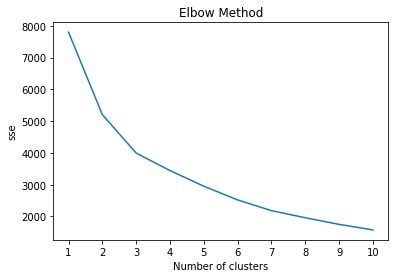

In [9]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [10]:
len(sse)

10

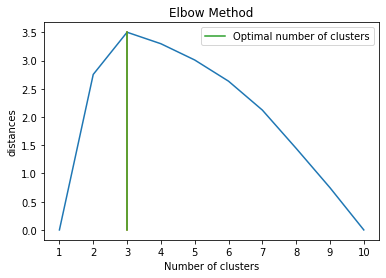

In [11]:
def optimal_number_of_clusters(sse):
    x1, y1 = 1, sse[0]
    x2, y2 = len(sse), sse[-1]
    distances = []
    for i,y0 in enumerate(sse):
        x0 = i+1
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances

distances = optimal_number_of_clusters(sse)
n_max_dist = distances.index(max(distances)) + 1
  
plt.plot(range(1, 11), distances)
plt.plot([n_max_dist,n_max_dist],[0,max(distances)])
plt.plot([n_max_dist,n_max_dist],[0,max(distances)], label = 'Optimal number of clusters')
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distances')
plt.legend(loc='best')
plt.show()

### Usando a bilioteca kneed

In [12]:
%%capture
!pip install kneed

In [13]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

### Coeficiente de Silhueta

Mede a relação entre quão próximo um elemento está dos elementos do mesmo cluster e qual longe está dos elementos dos demais cluters.

$$ SWC = \frac {1}{N} \sum_{i=1}^n{s(i)} $$

SWC = Silhuetamédia sobre todos os objetos:

$$s(i) = \frac {b(i)-a(i)}{max\{a(i),b(i)\}} $$

a(i)e b(i) são calculados como a distância média(Euclidiana, Mahalanobis, etc) do i-ésimo objeto.

- a (i) é a dissimilaridade média do i ésimo objeto para todos os outros objetos no mesmo cluster
- b (i) é a dissimilaridade média do i ésimo objeto com todos os objetos no agrupamento que não contem o elemento i.

For n_clusters=2, Silhouette Coefficient = 0.7034376901508647
For n_clusters=3, Silhouette Coefficient = 0.6721852777911661
For n_clusters=4, Silhouette Coefficient = 0.6768464659289004
For n_clusters=5, Silhouette Coefficient = 0.673223224985856
For n_clusters=6, Silhouette Coefficient = 0.6532884455087177


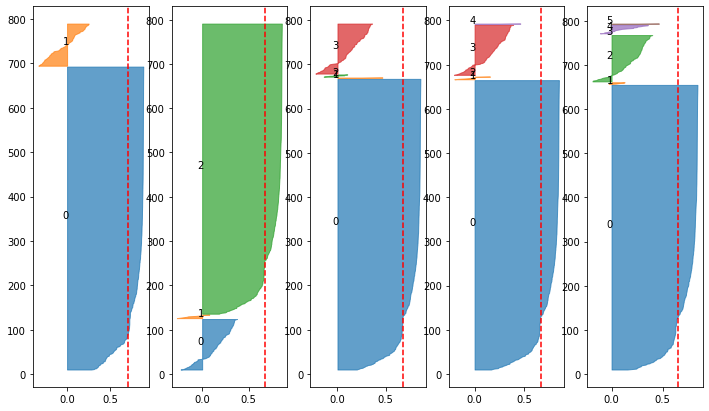

In [14]:
def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.tab10 if len(labels) <= 10 else plt.cm.tab20
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 1  # 1 for the 0 samples

    sil_coeff = silhouette_scores.mean()
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))

    # The vertical line for average silhouette score of all the values
    ax.axvline(x = sil_coeff, color="red", linestyle="--")

    return ax, sil_coeff

#### Plot
sil_coeffecients = []

fig, axes = plt.subplots(1, 5, figsize=(12, 7))

for ax,n_cluster in zip(axes.T,range(2,7)):
    kmeans = KMeans(n_clusters = n_cluster, **kmeans_kwargs).fit(scaled_features)
    label = kmeans.labels_

    ax2, silhuete_coef = silhouette_plot(scaled_features,label, ax=ax)
    sil_coeffecients.append(silhuete_coef)

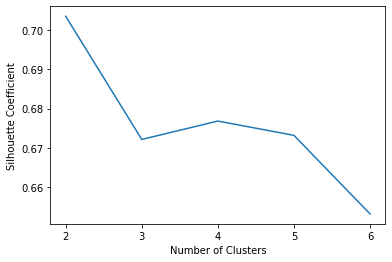

In [15]:
plt.plot(range(2,7), sil_coeffecients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Nota-se que no método do cotovelo, o número de Cluster de menor inércia é k = 3. Já o método da silhueta indica o número de k=4 clusters, por questão de menor custo escolhe-se k = 3, visto que apresenta valor de coeficiente de silhueta próximo a k =4. 

In [16]:
df['clusters_km'] = kmeans0.labels_
df

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range,clusters_km
0,4970767.00,4331363.0,4500026.0,10054901.0,470741.0,4225121.0,5829780.0,3030655.0,0.0,2550000,0
1,7797039.00,5561156.0,6537053.0,7798975.0,1259986.0,1641702.0,6157273.0,1359229.0,0.0,5000000,0
2,24735297.00,21684470.0,30668490.0,25516066.0,-5933193.0,12338134.0,13177932.0,515417.0,0.0,5000000,0
3,9890688.00,7849392.0,8092319.0,12520458.0,1798369.0,2222107.0,10298351.0,2299144.0,0.0,5000000,0
4,21331662.00,8634192.0,19725559.0,17582281.0,1606103.0,6759203.0,10823078.0,4358012.0,0.0,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...
775,4555299.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
776,729868.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
777,1083563.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
778,517093.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


In [17]:
df.groupby('clusters_km').mean().sort_values(by = df.columns[:10].to_list(), ascending = False)

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
clusters_km,,,,,,,,,,
1,3.871253e+07,6.797246e+06,3.155467e+07,6.217362e+07,7.157859e+06,6.566691e+06,5.560693e+07,5.745897e+06,-94162.222222,4.444444e+06
0,1.158905e+07,6.580748e+06,1.064132e+07,1.172847e+07,9.477294e+05,3.106239e+06,8.622231e+06,1.251430e+06,1433.643478,4.936087e+06
2,1.264520e+06,5.875415e+05,1.181414e+06,1.897834e+06,6.894919e+04,3.737315e+05,1.524103e+06,1.099435e+05,-407.460625,2.380335e+06


In [18]:
df['clusters_km'].value_counts()

2    656
0    115
1      9
Name: clusters_km, dtype: int64

### Analise dos Clusters do k-means:

- 0 : Valores médios de receita e demais métricas. 
- 1 : Maiores valores de receita, lucro e demais métricas. Por conta disso acaba sendo o menor cluster.
- 2 : Menores valores de lucro e demais métricas

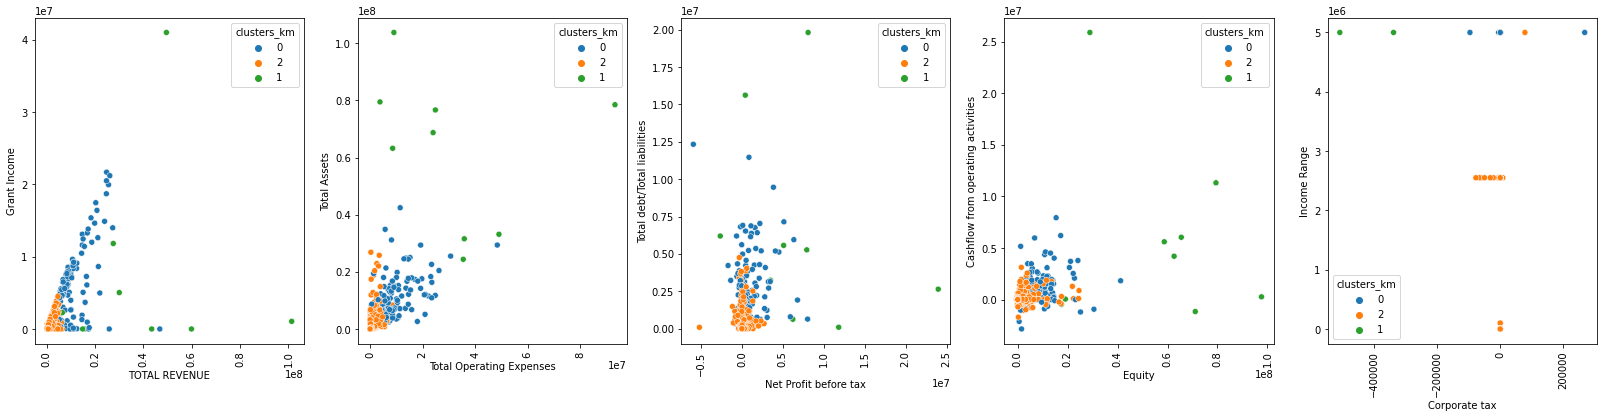

In [19]:
cols = df.columns[:10]

df['clusters_km'] = df['clusters_km'].astype(str)

plt.figure(figsize=(28,6))
for i in range(0,len(cols),2):
    plt.subplot(1, 5, 1 + i//2)
    sns.scatterplot(x = cols[i], y=cols[i+1], hue='clusters_km', data = df)
    plt.xticks(rotation=90)

## Spectral Clustering

[Referência](https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html)

In [20]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters = 3,
                                assign_labels = 'discretize',
                                random_state=0).fit(scaled_features)
# assign_labels{‘kmeans’, ‘discretize’, ‘cluster_qr’}, default=’kmeans’

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
clusters_spec,,,,,,,,,,
2,6.932287e+07,3.520730e+05,5.919413e+07,4.648658e+07,1.012873e+07,8.895785e+06,3.759079e+07,1.009346e+07,89362.666667,3.333333e+06
1,2.295119e+07,3.185773e+06,1.762971e+07,6.938902e+07,5.321476e+06,3.502128e+06,6.588689e+07,3.448873e+06,-141243.333333,5.000000e+06
0,2.808046e+06,1.534653e+06,2.593244e+06,3.369030e+06,2.027564e+05,7.960901e+05,2.572940e+06,2.811632e+05,-480.561829,2.761543e+06


0    771
1      6
2      3
Name: clusters_spec, dtype: int64

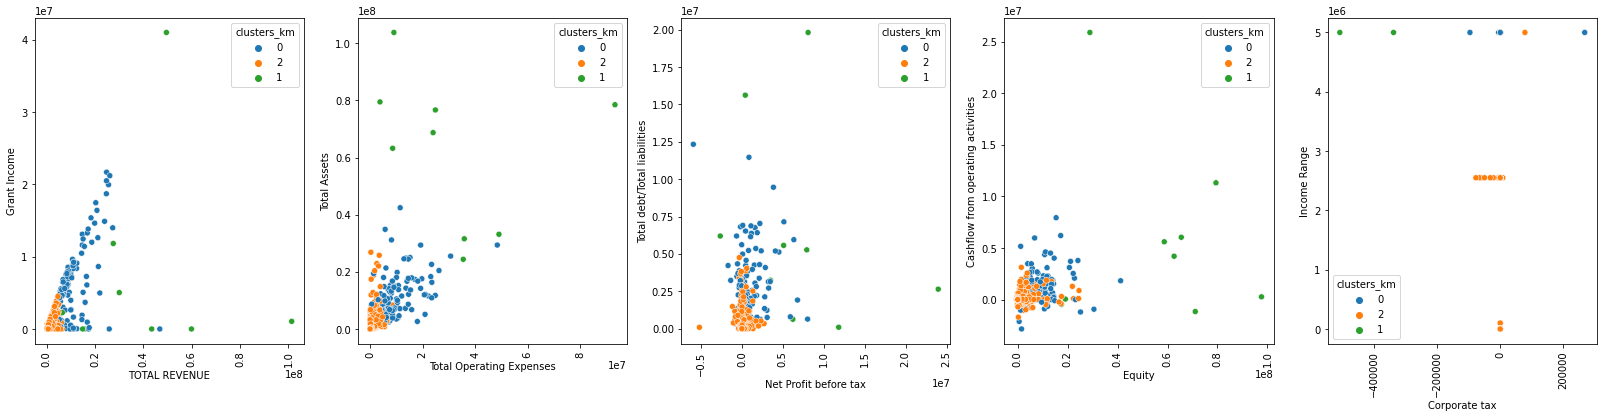

In [21]:
df['clusters_spec'] = clustering.labels_
display(df.groupby('clusters_spec').mean().sort_values(by = df.columns[:10].to_list(), ascending = False))

display(df['clusters_spec'].value_counts())

df['clusters_spec'] = df['clusters_spec'].astype(str) # Transformando em string para a hua categórica, escala qualitativa de cores

plt.figure(figsize=(28,6))
for i in range(0,len(cols)-1,2):
    plt.subplot(1, 5, 1 + i//2)
    sns.scatterplot(x = cols[i], y=cols[i+1], hue='clusters_km', data = df)
    plt.xticks(rotation=90)

## DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 56
Silhouette Coefficient: 0.550


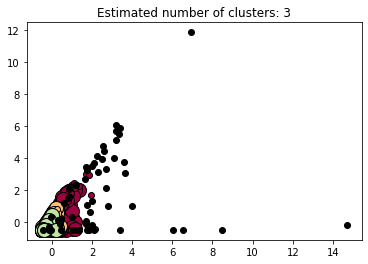

In [22]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
# --------------
# min_samplesint, default=5

db = DBSCAN(eps = 2, min_samples = 10).fit(scaled_features)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(scaled_features, labels))

# %%
# Plot result
# -----------

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = scaled_features[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = scaled_features[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

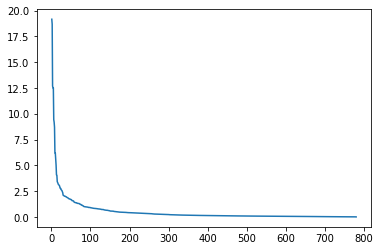

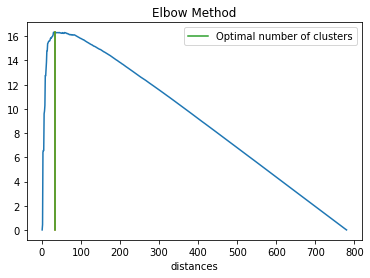

eps escolhido = 2.004171


In [23]:
from sklearn.neighbors import NearestNeighbors


neighbors = 2
nbrs = NearestNeighbors(n_neighbors = neighbors).fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)
distance_desc = sorted(distances[:,-1], reverse=True)
plt.plot(range(1,len(distance_desc)+1),distance_desc )
plt.show()

############################

distances2 = optimal_number_of_clusters(distance_desc)
n_max_dist = distances2.index(max(distances2)) + 1

plt.plot(range(1, len(distances2)+1), distances2)
plt.plot([n_max_dist,n_max_dist],[0,max(distances2)])
plt.plot([n_max_dist,n_max_dist],[0,max(distances2)], label = 'Optimal number of clusters')
plt.title('Elbow Method')
plt.xlabel('distances')
plt.legend(loc='best')
plt.show()

print(f"eps escolhido = {distance_desc[n_max_dist]:2f}")

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
clusters_db,,,,,,,,,,
noise,1.922109e+07,7.706997e+06,1.685474e+07,2.352215e+07,2.366358e+06,4.919479e+06,1.860268e+07,2.489265e+06,-11881.803571,4.557143e+06
0,8.346522e+06,5.009610e+06,7.831275e+06,7.958588e+06,5.152475e+05,1.911295e+06,6.047293e+06,7.458842e+05,15.358974,5.000000e+06
1,1.248669e+06,6.178663e+05,1.170048e+06,1.929279e+06,7.862075e+04,3.828790e+05,1.546400e+06,1.132412e+05,-479.767454,2.550000e+06
2,7.717085e+05,2.485873e+05,6.026228e+05,1.296455e+06,-2.044222e+04,1.701024e+05,1.126353e+06,5.240130e+04,14.673469,3.265306e+04


1        597
0         78
noise     56
2         49
Name: clusters_db, dtype: int64

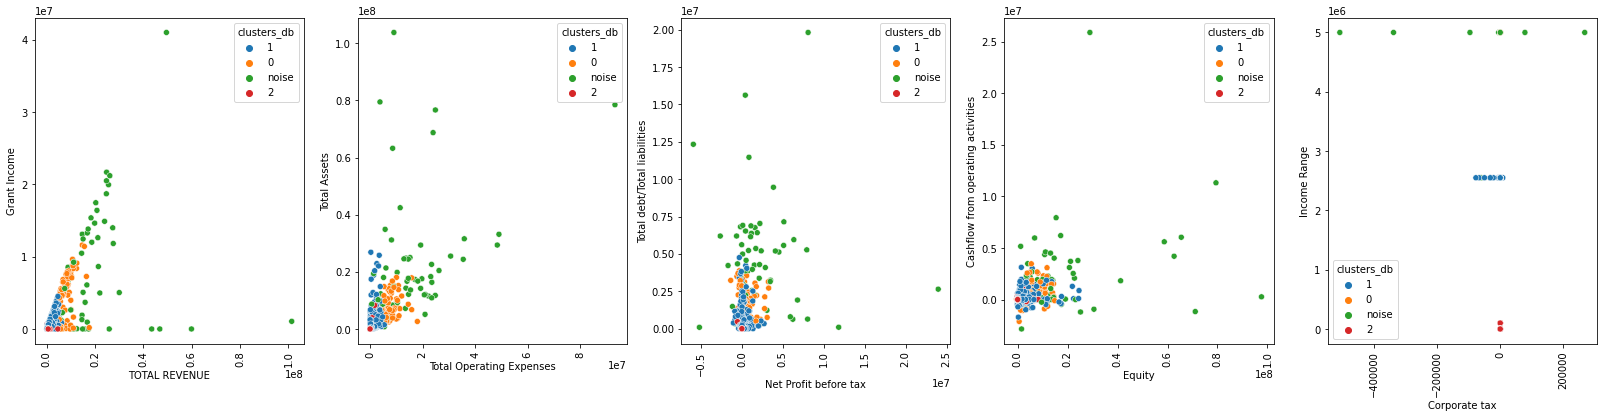

In [24]:
df['clusters_db'] = labels

df['clusters_db'] = df['clusters_db'].astype(str)

df['clusters_db'] = np.where(df['clusters_db'] == '-1', 'noise',df['clusters_db'])

display(df.groupby('clusters_db').mean().sort_values(by = df.columns[:10].to_list(), ascending = False))

display(df['clusters_db'].value_counts())

plt.figure(figsize=(28,6))
for i in range(0,len(cols)-1,2):
    plt.subplot(1, 5, 1 + i//2)
    sns.scatterplot(x = cols[i], y=cols[i+1], hue='clusters_db', data = df)
    plt.xticks(rotation=90)

## Birch

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
clusters_brc,,,,,,,,,,
0,3.736485e+07,2.521357e+06,2.936423e+07,6.580166e+07,8.000616e+06,5.434469e+06,6.036720e+07,6.522741e+06,-105932.500000,4.375000e+06
2,2.652892e+07,1.782777e+07,2.667958e+07,1.876746e+07,-1.506587e+05,6.323229e+06,1.244423e+07,6.379060e+05,20622.153846,5.000000e+06
1,2.459663e+06,1.253566e+06,2.241112e+06,3.139560e+06,2.063161e+05,7.059392e+05,2.433621e+06,2.730906e+05,-488.159644,2.726153e+06


1    759
2     13
0      8
Name: clusters_brc, dtype: int64

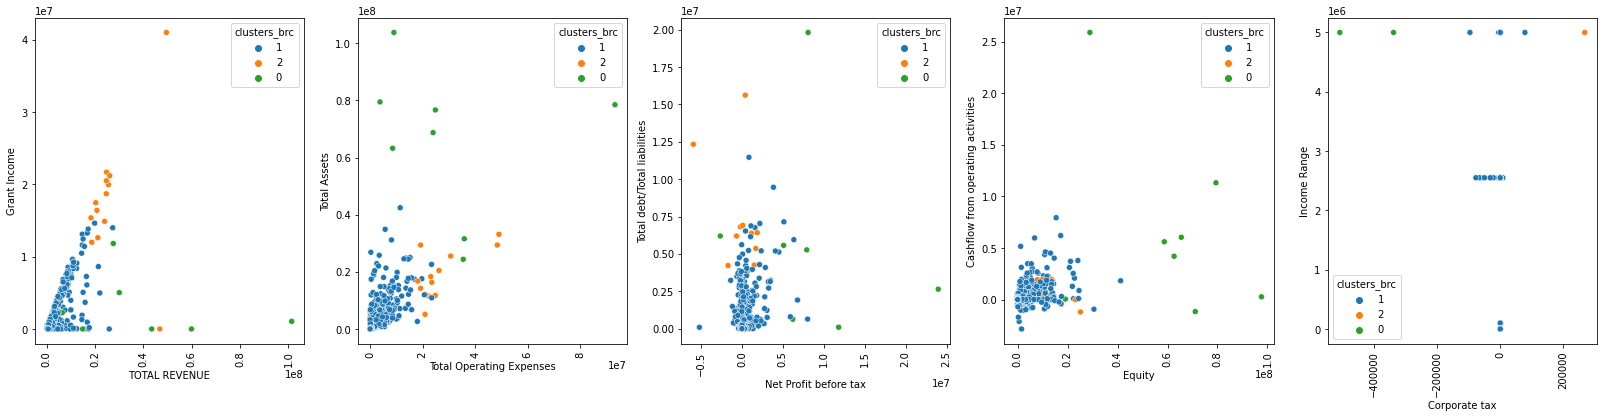

In [25]:
from sklearn.cluster import Birch

brc = Birch(n_clusters = 3)
brc.fit(scaled_features)
label_brc = brc.predict(scaled_features)

df['clusters_brc'] = label_brc

display(df.groupby('clusters_brc').mean().sort_values(by = df.columns[:10].to_list(), ascending = False))

display(df['clusters_brc'].value_counts())

df['clusters_brc'] = df['clusters_brc'].astype(str)

plt.figure(figsize=(28,6))
for i in range(0,len(cols)-1,2):
    plt.subplot(1, 5, 1 + i//2)
    sns.scatterplot(x = cols[i], y=cols[i+1], hue='clusters_brc', data = df)
    plt.xticks(rotation=90)

## Agglomerative clustering

,TOTAL REVENUE,Grant Income,Total Operating Expenses,Total Assets,Net Profit before tax,Total debt/Total liabilities,Equity,Cashflow from operating activities,Corporate tax,Income Range
clusters_agl,,,,,,,,,,
0,3.736485e+07,2.521357e+06,2.936423e+07,6.580166e+07,8.000616e+06,5.434469e+06,6.036720e+07,6.522741e+06,-105932.500000,4.375000e+06
2,1.173916e+07,6.600692e+06,1.082634e+07,1.140065e+07,9.128183e+05,3.017485e+06,8.383164e+06,1.132749e+06,2027.175000,5.000000e+06
1,1.231688e+06,5.998996e+05,1.148277e+06,1.930713e+06,6.916741e+04,3.925025e+05,1.538211e+06,1.221452e+05,-530.193512,2.352991e+06


1    652
2    120
0      8
Name: clusters_agl, dtype: int64

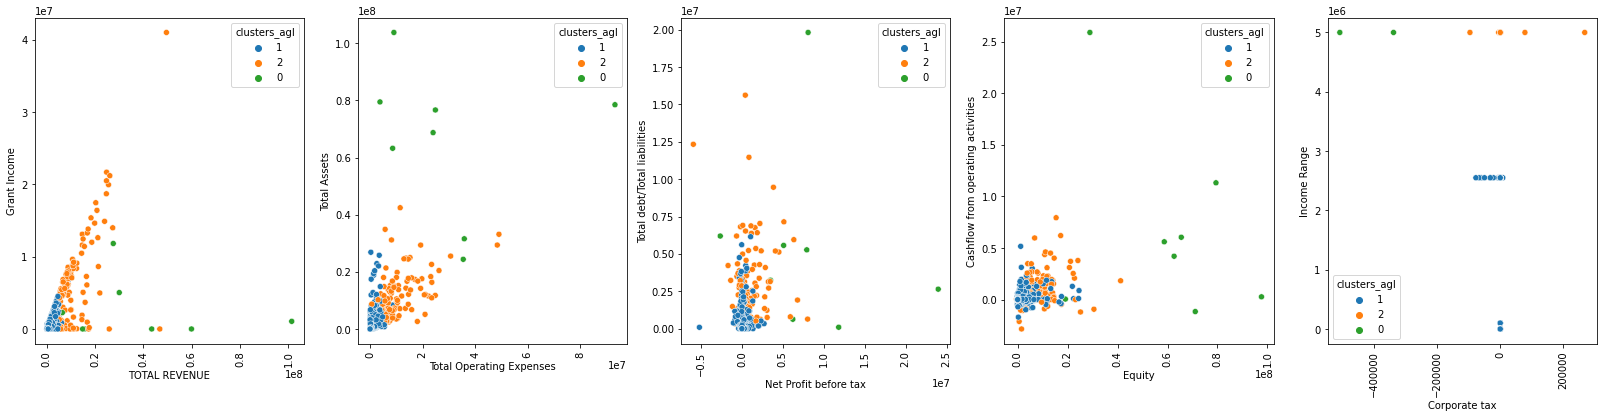

In [26]:
from sklearn.cluster import AgglomerativeClustering

clustering_agl = AgglomerativeClustering(n_clusters = 3).fit(scaled_features)

# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’


df['clusters_agl'] = clustering_agl.labels_

display(df.groupby('clusters_agl').mean().sort_values(by = df.columns[:10].to_list(), ascending = False))

display(df['clusters_agl'].value_counts())

df['clusters_agl'] = df['clusters_agl'].astype(str)

plt.figure(figsize=(28,6))
for i in range(0,len(cols)-1,2):
    plt.subplot(1, 5, 1 + i//2)
    sns.scatterplot(x = cols[i], y=cols[i+1], hue='clusters_agl', data = df)
    plt.xticks(rotation=90)